# Importing Libraries

In [1]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn import neighbors
from sklearn import metrics
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle

# Importing files

In [4]:
training = "master.csv"
training1 = "lec_tues_4.csv"
training2 = "lab_mon_5.csv"
training3 = "tut_wed_4.csv"
training4 = "lab_fri_4.csv"
training5 = "tut_fri_4.csv"
training6 = "sun_4.csv"
training7 = "lab_wed_5.csv"

path = "C:\\Users\\ieliz\\Documents\\2021\\FYP\\Stress_Detection_FYP\\python_scripts\\"

In [5]:
os.chdir(path)
print(os.getcwd())
df = pd.read_csv(training)
df1 = pd.read_csv(training1)
df2 = pd.read_csv(training2)
df3 = pd.read_csv(training3)
df4 = pd.read_csv(training4)
df5 = pd.read_csv(training5)
df6 = pd.read_csv(training6)
df7 = pd.read_csv(training7)

df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df = df.append(df6, ignore_index=True)
df = df.append(df7, ignore_index=True)

df["Time (hr:min:sec)"] = pd.to_datetime(df["Time (hr:min:sec)"], format="%H:%M:%S").dt.time

C:\Users\ieliz\Documents\2021\FYP\Stress_Detection_FYP\python_scripts


In [6]:
# TESTING DATA
test = "lab_wed_4.csv"
test1 = "lab_wed_5.csv"

df_test = pd.read_csv(test)
df_test1 = pd.read_csv(test1)

df_test = df_test.append(df_test1, ignore_index=True)

df_test["Time (hr:min:sec)"] = pd.to_datetime(df_test["Time (hr:min:sec)"], format="%H:%M:%S").dt.time

In [73]:
df

,Time (hr:min:sec),Time (s),GSR,Resistance,Conductance (uS),Heart_Rate,Section,Stressed,Section_labels,Normalised_GSR,Normalised_HR
0,12:00:01,1,225,51358.88502,19.470828,68,RelaxM4_,2,12:00:01RelaxM4_,0.186306,0.212389
1,12:00:02,2,224,51111.11111,19.565217,68,RelaxM4_,2,12:00:02RelaxM4_,0.186306,0.212389
2,12:00:03,3,224,51111.11111,19.565217,69,RelaxM4_,2,12:00:03RelaxM4_,0.186306,0.212389
3,12:00:04,4,225,51358.88502,19.470828,68,RelaxM4_,2,12:00:04RelaxM4_,0.186306,0.212389
4,12:00:05,5,224,51111.11111,19.565217,68,RelaxM4_,2,12:00:05RelaxM4_,0.186306,0.212389
...,...,...,...,...,...,...,...,...,...,...,...
56091,11:31:49,3597,439,260547.94520,3.838065,63,wed_lab_5_3,2,11:31:49wed_lab_5_3,NaN,NaN
56092,11:31:50,3598,439,260547.94520,3.838065,63,wed_lab_5_3,2,11:31:50wed_lab_5_3,NaN,NaN
56093,11:31:51,3599,443,276811.59420,3.612565,63,wed_lab_5_3,2,11:31:51wed_lab_5_3,NaN,NaN
56094,11:31:52,3600,444,281176.47060,3.556485,63,wed_lab_5_3,2,11:31:52wed_lab_5_3,NaN,NaN


In [8]:
df["Section"].unique()

array(['RelaxM4_', 'LabM4_1_', 'LabM4_2_', 'LabM4_3_', 'lec_tues_0',
       'lab_mon_5', 'lab_mon_5_1', 'tut_wed_4_0', 'tut_wed_4_1',
       'lab_fri4_1', 'tut_fri4_1', 'tut_fri4_2', 'sun_data_1', 'sun_data',
       'wed_lab_5_1', 'wed_lab_5_2', 'wed_lab_5_3'], dtype=object)

# Calculating Conductance

In [9]:
# df["Conductance (uS)"] = 1*10**6/df["Resistance"]

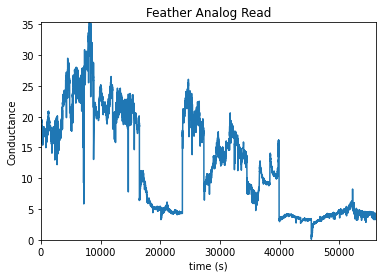

In [10]:
fig, ax = plt.subplots()
ax.set_xlim((0, len(df)))
ax.set_ylim((0, max(df["Conductance (uS)"])))
ax.set_title('Feather Analog Read')
ax.set_xlabel("time (s)")
ax.set_ylabel("Conductance")
ax.plot(df.index, df["Conductance (uS)"])

# Pre-processing Data and Feature Extraction
## Separating into sections

In [74]:
df["Section_labels"] = df["Time (hr:min:sec)"].astype(str)+df["Section"].astype(str)
unique_sections = df["Section_labels"].unique()
unique_sections_num = df["Section_labels"].nunique()
print(unique_sections)

labels = []
for name in unique_sections:
    curr_label = df.loc[df["Section_labels"] == name, 'Stressed'].unique()[0]
    labels.append(curr_label)
    
#print(labels)

['12:00:01RelaxM4_' '12:00:02RelaxM4_' '12:00:03RelaxM4_' ...
 '11:31:51wed_lab_5_3' '11:31:52wed_lab_5_3' '11:31:53wed_lab_5_3']


## Moving average filter

## Min-Max Normalisation

In [75]:
min_val_gsr = min(df['Conductance (uS)'])
max_val_gsr = max(df['Conductance (uS)'])
scaling_gsr = max_val_gsr-min_val_gsr
df.loc[:, 'Normalised_GSR'] = (df.loc[:, 'Conductance (uS)']- min_val_gsr)/scaling_gsr 

min_val_hr = min(df["Heart_Rate"])
max_val_hr = max(df["Heart_Rate"])
scaling_hr = max_val_hr-min_val_hr
df.loc[:, "Normalised_HR"] = (df.loc[:, "Heart_Rate"]- min_val_hr)/scaling_hr 

# K-Nearest Neighbours

In [76]:
n_neighbours = 3
X = df.loc[:, ['Normalised_HR', 'Normalised_GSR']]
y = df.loc[:, 'Stressed']

In [77]:
df.loc[:, ['Normalised_HR', 'Normalised_GSR']]

,Normalised_HR,Normalised_GSR
0,0.185841,0.549814
1,0.185841,0.552493
2,0.194690,0.552493
3,0.185841,0.549814
4,0.185841,0.552493
...,...,...
56091,0.141593,0.106149
56092,0.141593,0.106149
56093,0.141593,0.099749
56094,0.141593,0.098158


In [85]:
weight = 'distance' #'uniform'
clf = neighbors.KNeighborsClassifier(n_neighbours, weight)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [63]:
clf2 = sklearn.linear_model.LogisticRegression()
clf2.fit(X, y)

LogisticRegression()

In [64]:
knn_model = clf
clf=clf2

# TESTING DATA

In [79]:
# TESTING DATA
df_test["Section_labels"] = df_test["Time (hr:min:sec)"].astype(str) + df_test["Stressed"].astype(str)
unique_sections_test = df_test["Section_labels"].unique()
unique_sections_num_test = df_test["Section_labels"].nunique()
print(unique_sections_test)

labels_test = []
for name in unique_sections_test:
    curr_label = df_test.loc[df_test["Section_labels"] == name, 'Stressed'].unique()[0]
    labels_test.append(curr_label)
    
#print(labels_test)

['08:10:004' '08:10:014' '08:10:024' ... '11:31:512' '11:31:522'
 '11:31:532']


In [80]:
min_val_gsr = min(df_test['Conductance (uS)'])
max_val_gsr = max(df_test['Conductance (uS)'])
scaling_gsr = max_val_gsr-min_val_gsr
df_test.loc[:, 'Normalised_GSR'] = (df_test.loc[:, 'Conductance (uS)']- min_val_gsr)/scaling_gsr 

min_val_hr = min(df["Heart_Rate"])
max_val_hr = max(df["Heart_Rate"])
scaling_hr = max_val_hr-min_val_hr
df_test.loc[:, "Normalised_HR"] = (df_test.loc[:, "Heart_Rate"]- min_val_hr)/scaling_hr 

In [81]:
stress_df_test=df_test
stress_df_test

,Time (hr:min:sec),Time (s),GSR,Resistance,Conductance (uS),Heart_Rate,Section,Stressed,Section_labels,Normalised_GSR,Normalised_HR
0,08:10:00,1,430,229756.0976,4.352442,71,lab_wed_4_0,4,08:10:004,0.186306,0.212389
1,08:10:01,2,430,229756.0976,4.352442,71,lab_wed_4_0,4,08:10:014,0.186306,0.212389
2,08:10:02,3,430,229756.0976,4.352442,71,lab_wed_4_0,4,08:10:024,0.186306,0.212389
3,08:10:03,4,430,229756.0976,4.352442,71,lab_wed_4_0,4,08:10:034,0.186306,0.212389
4,08:10:04,5,430,229756.0976,4.352442,71,lab_wed_4_0,4,08:10:044,0.186306,0.212389
...,...,...,...,...,...,...,...,...,...,...,...
21595,11:31:49,3597,439,260547.9452,3.838065,63,wed_lab_5_3,2,11:31:492,0.163782,0.141593
21596,11:31:50,3598,439,260547.9452,3.838065,63,wed_lab_5_3,2,11:31:502,0.163782,0.141593
21597,11:31:51,3599,443,276811.5942,3.612565,63,wed_lab_5_3,2,11:31:512,0.153907,0.141593
21598,11:31:52,3600,444,281176.4706,3.556485,63,wed_lab_5_3,2,11:31:522,0.151451,0.141593


In [86]:
#Testing model

# saved_model_name = "log_model_all.sav"
# clf = pickle.load(open(saved_model_name, 'rb'))
tp = 0
fp = 0
tn = 0
fn = 0

predicted_labels = []
actual_labels = []

for i in range(len(stress_df_test)):
    predicted_label = clf.predict([stress_df_test.iloc[i, 9:11]])[0]
    print(i)
    actual_label = stress_df_test.iloc[i, 7]

    if predicted_label >= 5:
        print("Predicted: Stressed", predicted_label)
        if actual_label >= 5:
            print("Actual: Stressed", actual_label)
            tp += 1
        else:
            print("Actual: Not Stressed", actual_label)  
            fp += 1
            
    else:
        print("Predicted: Not Stressed", predicted_label)
        if actual_label >= 5:
            print("Actual: Stressed", actual_label)
            fn += 1 
        else:
            print("Actual: Not Stressed", actual_label)
            tn += 1
    
    predicted_labels.append(predicted_label)
    actual_labels.append(actual_label)
    
print("\nTotal:", tp+tn+fp+fn, "\n")

acc = (tp+tn)/(tp+tn+fp+fn)*100
sensitivity = tp/(tp+fn)*100 # true positive rate
specificity = tn/(tn+fp)*100# true negative rate
#precision = tp/(tp+fp)*100

print("TP: {}, TN = {}, FP: {}, FN: {}".format(tp, tn, fp, fn))
print("Accuracy: {}, Sensitivity: {}, Specificity: {}".format(acc, sensitivity, specificity))

0
Predicted: Not Stressed 3
Actual: Not Stressed 4
1
Predicted: Not Stressed 3
Actual: Not Stressed 4
2
Predicted: Not Stressed 3
Actual: Not Stressed 4
3
Predicted: Not Stressed 3
Actual: Not Stressed 4
4
Predicted: Not Stressed 3
Actual: Not Stressed 4
5
Predicted: Not Stressed 3
Actual: Not Stressed 4
6
Predicted: Not Stressed 3
Actual: Not Stressed 4
7
Predicted: Not Stressed 3
Actual: Not Stressed 4
8
Predicted: Not Stressed 4
Actual: Not Stressed 4
9
Predicted: Not Stressed 2
Actual: Not Stressed 4
10
Predicted: Not Stressed 4
Actual: Not Stressed 4
11
Predicted: Not Stressed 4
Actual: Not Stressed 4
12
Predicted: Not Stressed 4
Actual: Not Stressed 4
13
Predicted: Not Stressed 4
Actual: Not Stressed 4
14
Predicted: Not Stressed 4
Actual: Not Stressed 4
15
Predicted: Not Stressed 4
Actual: Not Stressed 4
16
Predicted: Not Stressed 4
Actual: Not Stressed 4
17
Predicted: Not Stressed 2
Actual: Not Stressed 4
18
Predicted: Not Stressed 4
Actual: Not Stressed 4
19
Predicted: Not Stre

In [87]:
#confusion matrix
cm = metrics.confusion_matrix(actual_labels, predicted_labels)
print(cm)
print(predicted_labels)

[[   0    0    0    0    0    0    0]
 [   0   17  978   72 2419  221   13]
 [   9  556 3209 1437  772  509  773]
 [   3  626 2038 1721 1211 1173  240]
 [   1  280  791  967  121  203   22]
 [   0  108  339  419   17   74    0]
 [   0   83   34   66    1   77    0]]
[3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 3, 5, 3, 4, 3, 4, 4, 2, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 5, 4, 2, 4, 2, 3, 3, 3, 5, 2, 4, 3, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 2, 5, 5, 3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 6, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 2, 2, 2, 2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 2, 3, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 5, 2, 5, 2, 2, 2, 2, 2, 4, 4, 4, 4, 3, 4, 3, 4, 4, 6, 6, 2, 3, 4, 3, 2, 4, 3, 2, 4, 4, 2, 6, 6, 4, 5, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 

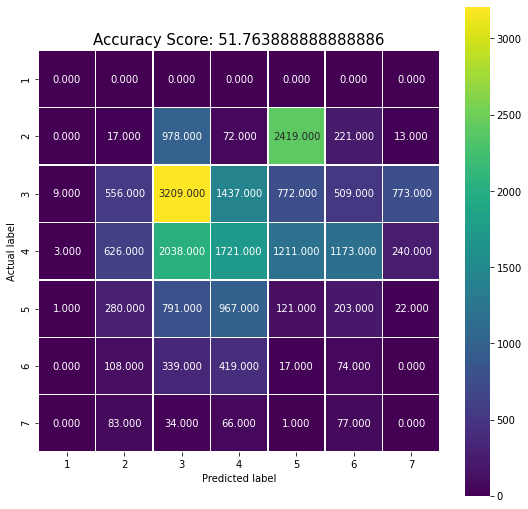

In [88]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis', xticklabels=[1,2,3,4,5,6,7], yticklabels=[1,2,3,4,5,6,7]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);